In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


# BMI Calculator 

200 entries for height and weight and calculate the BMI and then categories ass Slim, Normal, Fat

In [2]:
np.random.seed(42)
height = np.random.randint(140,200,200)
weight = np.random.randint(40,120,200)
bmi = weight/((height/100)**2)

BMI = pd.DataFrame({"Height": height, "Weight": weight, "BMI":bmi})
BMI

,Height,Weight,BMI
0,178,110,34.717839
1,191,98,26.863299
2,168,67,23.738662
3,154,105,44.273908
4,182,81,24.453568
...,...,...,...
195,182,99,29.887695
196,168,46,16.298186
197,175,96,31.346939
198,152,75,32.461911


In [3]:
np.random.seed(50)
height = np.random.randint(140,200,200)
weight = np.random.randint(40,120,200)
bmi = weight/((height/100)**2)

def category(bmi):
    bmi = float(bmi)
    if bmi <= 19:
        return "You are Slim 🙋‍♂️ "
    elif bmi <= 25 and bmi > 19:
        return "You are Perfectly Fit 💪 "
    else:
        return "Over Weight : You need Gym 🏋️‍♀️ "
category = np.array([category (b) for b in bmi])
category

BMI = pd.DataFrame({"Height": height, "Weight": weight, "Category": category})
BMI


,Height,Weight,Category
0,188,104,Over Weight : You need Gym 🏋️‍♀️
1,172,118,Over Weight : You need Gym 🏋️‍♀️
2,151,92,Over Weight : You need Gym 🏋️‍♀️
3,185,66,You are Perfectly Fit 💪
4,173,85,Over Weight : You need Gym 🏋️‍♀️
...,...,...,...
195,154,87,Over Weight : You need Gym 🏋️‍♀️
196,196,99,Over Weight : You need Gym 🏋️‍♀️
197,142,70,Over Weight : You need Gym 🏋️‍♀️
198,180,103,Over Weight : You need Gym 🏋️‍♀️


In [4]:
L_C = LabelEncoder()
BMI["Category"] = L_C.fit_transform(BMI["Category"])
BMI

,Height,Weight,Category
0,188,104,0
1,172,118,0
2,151,92,0
3,185,66,1
4,173,85,0
...,...,...,...
195,154,87,0
196,196,99,0
197,142,70,0
198,180,103,0


In [5]:
X = BMI[["Height", "Weight"]]
Y = BMI["Category"]

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)

In [7]:
print(X_train,Y_train)

     Height  Weight
169     146      84
97      176      94
31      182      46
12      145      59
35      146      82
..      ...     ...
106     177      76
14      171     118
92      168     106
179     198      43
102     162      73

[140 rows x 2 columns] 169    0
97     0
31     2
12     0
35     0
      ..
106    1
14     0
92     0
179    2
102    0
Name: Category, Length: 140, dtype: int64


In [8]:
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

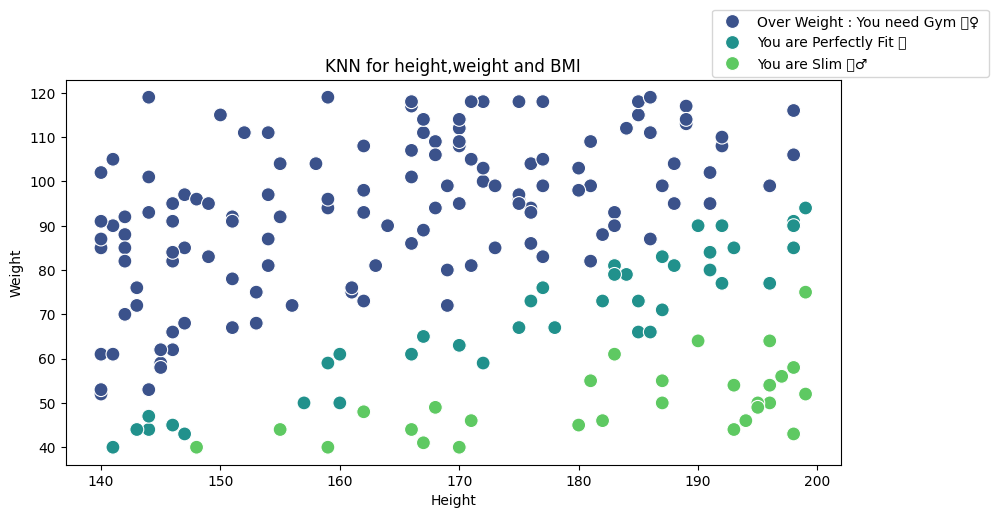

In [9]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=X,x=height,y=weight,hue=L_C.inverse_transform(Y),palette = "viridis", s =100)
plt.title("KNN for height,weight and BMI")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc = "upper right", bbox_to_anchor = (1,0.4,0.2,0.8))
plt.show()

Enter your Height in cm:  170
Enter your Weight in kg:  45


Distance = [[ 1.41421356  4.12310563  5.         10.        ]]


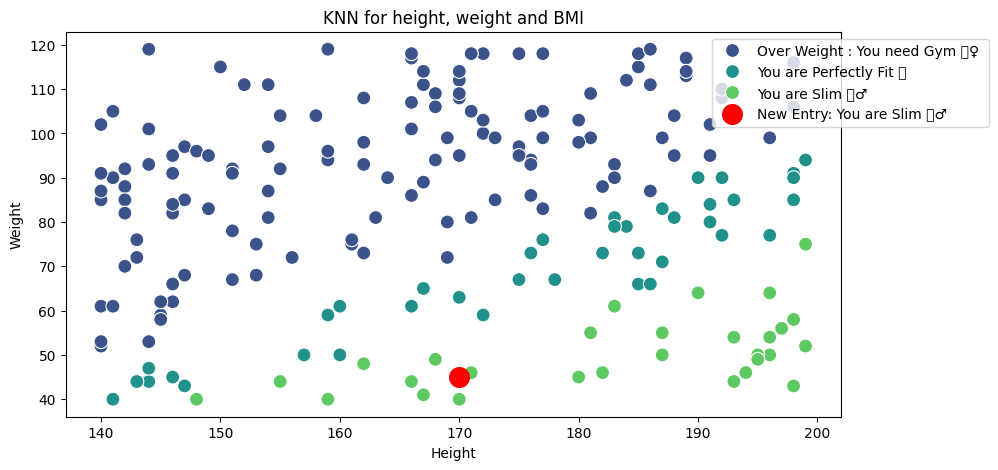

Height = 170.0 | Weight = 45.0 | Predicted Category = You are Slim 🙋‍♂️  


In [11]:
def predictBMI(data,model,L_C):
    p= model.predict(data)
    P_C = L_C.inverse_transform(p)[0]
    return P_C
user_H =float(input("Enter your Height in cm: "))
user_W =float(input("Enter your Weight in kg: "))

input_data = np.array([[user_H, user_W]])
predicted_Category = predictBMI(input_data,model,L_C)

D,I = model.kneighbors(input_data,n_neighbors = 4)

print(f"Distance = {D}")

plt.figure(figsize = (10,5))
# Training data plot
sns.scatterplot(data=X,x=height,y=weight,hue=L_C.inverse_transform(Y),palette = "viridis", s =100)

# Input data plot
plt.scatter(input_data[0,0], input_data[0,1],color = 'red',s =200, label = f'New Entry: {predicted_Category}')
plt.title("KNN for height, weight and BMI")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc = "upper right", bbox_to_anchor = (1,0.2,0.2,0.8))
plt.show()
print(f"Height = {user_H} | Weight = {user_W} | Predicted Category = {predicted_Category} ")